# Week 08 - Maps
Topics
- Intro to maps in bqplot (review)
- Geopandas
- Champaign districts & apartments (extra)
- Public data
- Geopandas + contextily
- Geopandas + ipywidgets

Extra:

- US waterways
- more with bqplot & geojson data
- Super quick ipyleaflets

In [104]:
# import our usual things
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import ipywidgets

## Geopandas

In [2]:
# shape data/"axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# scales
sc_geo = bqplot.Mercator() # not a great projection! 

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))

In [6]:
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


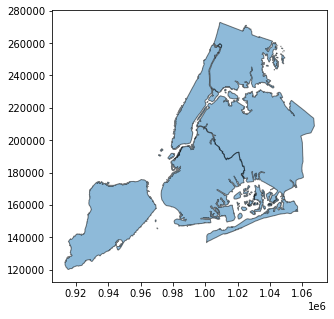

In [7]:
ax = df.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

In [8]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [9]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Angie Brix,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Greg Stock,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [10]:
gdf_councils.describe

<bound method NDFrame.describe of    OBJECTID_1 District                  Council_me   ShapeSTArea  \
0         811        5             Vanna Pianfetti  1.827758e+08   
1         812        3                  Angie Brix  2.007085e+08   
2         813        1  Clarissa Nickerson Fourman  1.078965e+08   
3         814        4                  Greg Stock  1.049800e+08   
4         815        2                 Alicia Beck  5.164512e+07   

   ShapeSTLength                                           geometry  
0  209845.933925  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  145404.494177  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2   83420.727939  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3   77363.320814  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4   62243.277115  POLYGON ((-88.23537 40.10798, -88.23537 40.107...  >

In [11]:
gdf_councils.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID_1     5 non-null      int64   
 1   District       5 non-null      object  
 2   Council_me     5 non-null      object  
 3   ShapeSTArea    5 non-null      float64 
 4   ShapeSTLength  5 non-null      float64 
 5   geometry       5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 368.0+ bytes


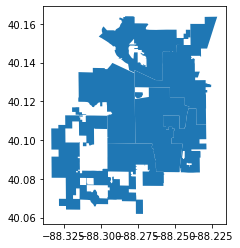

In [12]:
gdf_councils.plot()

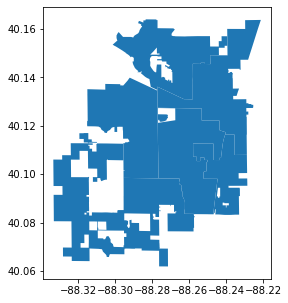

In [15]:
fig, ax = plt.subplots(figsize =(5,5))

gdf_councils.plot(ax=ax)

plt.show()

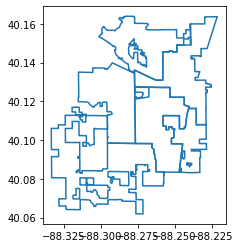

In [16]:
# example of shapedata specific plotting routing:
gdf_councils.boundary.plot()

In [18]:
# another shape-data specific 
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [20]:
# specific to shape data: centers of our individual objects
gdf_councils.centroid

C:\Users\lilpringles\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    POINT (-88.29998 40.08731)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [21]:
gdf_councils.crs
# this tells us 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
# if we want to combine spatial datasets they have to be in the same cordinate system -- keep that in mind

In [26]:
# dataset for 
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [28]:
gdf_props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


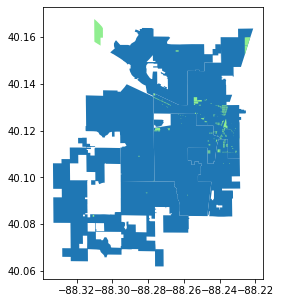

In [30]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')

plt.show()

this is the map of champaign 

In [31]:
#let's zoom in where we would be if in person

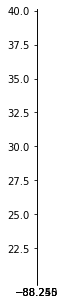

In [33]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')

ax.set_xlim(-88.245, -88.255)
ax.set_ylim(20.10, 40.125)

plt.show()

In [35]:
gdf_apt = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [36]:
gdf_apt

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,3679,4550 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11853.411499,521.384332,None,"POLYGON ((-88.32130 40.07657, -88.32145 40.076..."
2313,3680,4510 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11073.249023,503.919987,None,"POLYGON ((-88.31920 40.07663, -88.31922 40.076..."
2314,3681,4502 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,15584.976929,759.631935,None,"POLYGON ((-88.31818 40.07667, -88.31842 40.076..."
2315,4071,210 S Fourth St,462107377002 thru -004,77,7,NaN,None,None,None,Building,...,None,None,None,None,None,None,16389.222778,846.476530,None,"POLYGON ((-88.23274 40.11487, -88.23278 40.114..."


In [37]:
# we can add another layer, but color by a specific data attribute, in this case,
# let's chose the numer of stories in te building
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', None, '16', '13'], dtype=object)

In [38]:
gdf_apt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OBJECTID           2317 non-null   int64   
 1   Address            2315 non-null   object  
 2   Parcel             2311 non-null   object  
 3   Units              2156 non-null   object  
 4   Stories            2150 non-null   object  
 5   UniqueID           1716 non-null   float64 
 6   Building_Name      2298 non-null   object  
 7   Complex_Name       2042 non-null   object  
 8   Case_Number        1056 non-null   object  
 9   Building_Type      2135 non-null   object  
 10  Status             1055 non-null   object  
 11  Last_Date          2317 non-null   object  
 12  Comments           1130 non-null   object  
 13  Safety_Comments    1056 non-null   object  
 14  Fire_Alarms        11 non-null     object  
 15  Sprinkler          11 non-null     object  
 16

In [43]:
# requires data cleaning
# if we havea  None -- we'll turn that intoa  zero (in python a None == Null value)

gdf_apt.loc[gdf_apt['Stories'].isnull(), 'Stories'] = '0' # set Null stories to the strong '0'

this is one choice we are making to change nulls to 0 -- other options: leave it out, tag as -1

In [47]:
gdf_apt['Stories'].unique()
# there is still issues (e.g., an empty value) -- let's change it to 0

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', '0', '16', '13'], dtype=object)

In [49]:
gdf_apt.loc[gdf_apt['Stories'] == ' ', 'Stories'] = '0'

In [50]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', '0', '8', '16', '13'], dtype=object)

In [53]:
# now to convert from str to int
gdf_apt['Stories'] = pd.to_numeric(gdf_apt['Stories'], errors='coerce')
# the errors='coerce' is us telling pandas to figure out errors on its own

In [54]:
gdf_apt['Stories'].unique()

array([ 3,  2,  1,  5,  6,  4, 20, 24,  7,  0,  8, 16, 13], dtype=int64)

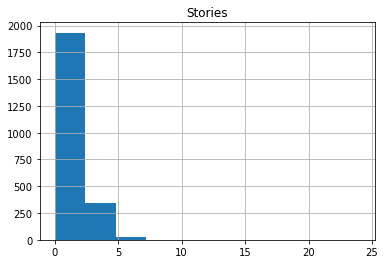

In [56]:
gdf_apt.hist(column='Stories')
plt.show()

plot out clean apt data over our city council map

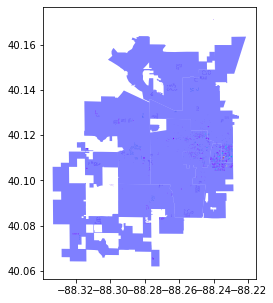

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
gdf_councils.plot(ax=ax, color='blue', alpha=.5)

gdf_apt.plot(column='Stories', ax=ax, cmap='rainbow')

plt.show()

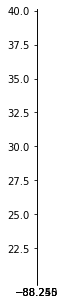

In [61]:
# zooming into person

fig, ax = plt.subplots(figsize=(5,5))
gdf_councils.plot(ax=ax, color='blue', alpha=.5)

gdf_apt.plot(column='Stories', ax=ax, cmap='rainbow')

ax.set_xlim(-88.245, -88.255)
ax.set_ylim(20.10, 40.125)

plt.show()

for some reason nothing pops up for me. Ask prof after

In [63]:
gdf_apt

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,3679,4550 Nicklaus Dr,462029402001,None,0,NaN,None,None,None,None,...,None,None,None,None,None,None,11853.411499,521.384332,None,"POLYGON ((-88.32130 40.07657, -88.32145 40.076..."
2313,3680,4510 Nicklaus Dr,462029402001,None,0,NaN,None,None,None,None,...,None,None,None,None,None,None,11073.249023,503.919987,None,"POLYGON ((-88.31920 40.07663, -88.31922 40.076..."
2314,3681,4502 Nicklaus Dr,462029402001,None,0,NaN,None,None,None,None,...,None,None,None,None,None,None,15584.976929,759.631935,None,"POLYGON ((-88.31818 40.07667, -88.31842 40.076..."
2315,4071,210 S Fourth St,462107377002 thru -004,77,7,NaN,None,None,None,Building,...,None,None,None,None,None,None,16389.222778,846.476530,None,"POLYGON ((-88.23274 40.11487, -88.23278 40.114..."


In [64]:
gdf_apt['Building_Type'].unique()
# lol, we have a None and other 

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [66]:
gdf_apt.loc[gdf_apt['Building_Type'].isnull(), 'Bulding_Type'] = 'Not Specified'

In [67]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

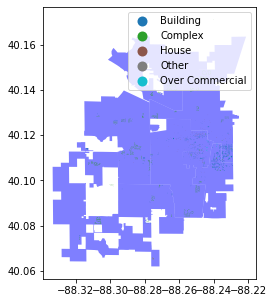

In [68]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, color='blue', alpha=.5)
gdf_apt.plot(column='Building_Type', ax=ax, cmap='tab10', categorical=True, legend=True)

plt.show()

## US Census data shape file

In [69]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip')

In [70]:
gdf_states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151895765,6979171386,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677759219,1323691129,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049923496,2391577745,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190113978,1025973001,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933025759,13456395178,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873081385,1030243281,+44.0589536,-072.6710173,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


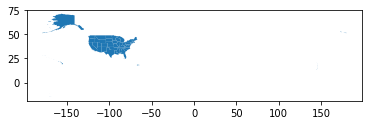

In [71]:
gdf_states.plot()

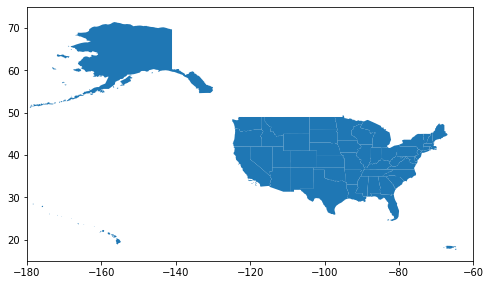

In [73]:
fig, ax = plt.subplots(figsize=(8,5))

gdf_states.plot(ax=ax)

# zoom into USA
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [76]:
# gdf_na = geopandas.read_file('~/Downloads/tl_2020_us_aiannh/tl_2020_us_aiannh.shp')

In [75]:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip')

In [77]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


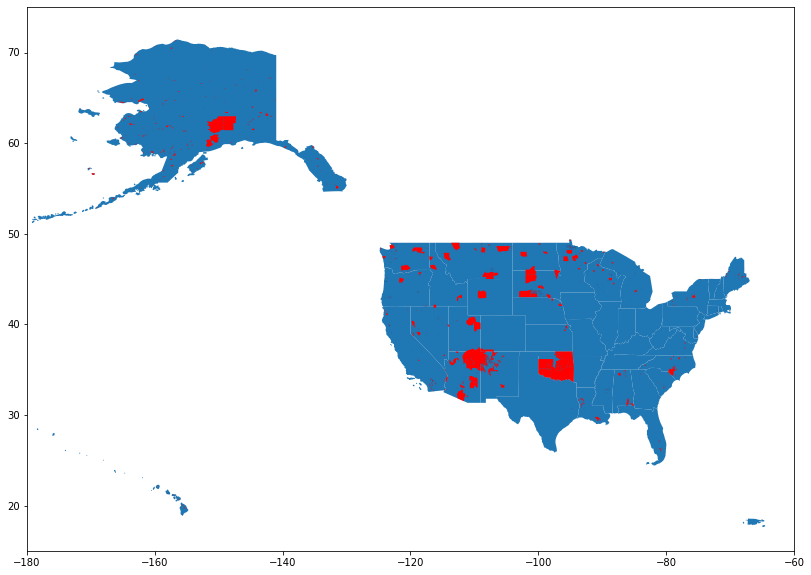

In [79]:
# plotting the native american reserves onto the us states
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='red')

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

In [80]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

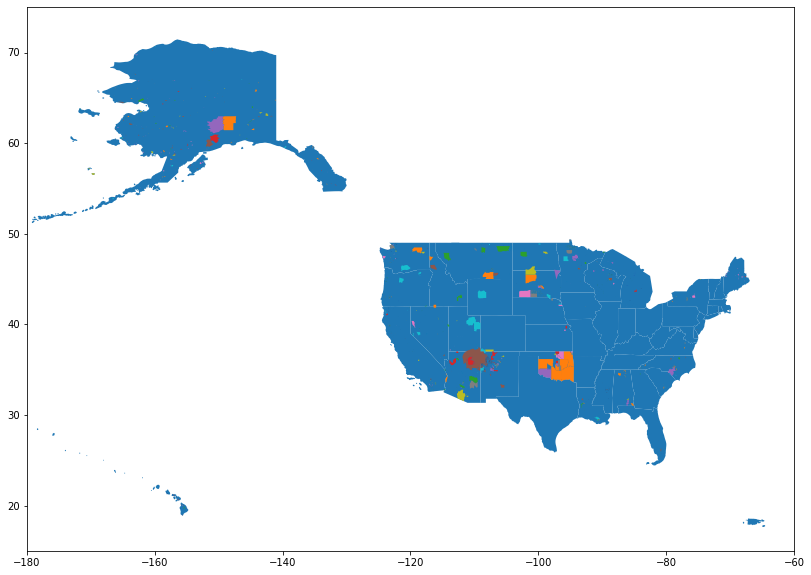

In [81]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

## Geopandas + contextily

Let's go back to our plot of the bouroughs:


In [82]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


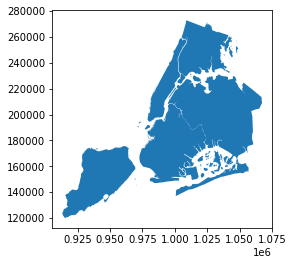

In [83]:
gdf.plot()

In [84]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [85]:
gdf = gdf.to_crs(epsg=4326)

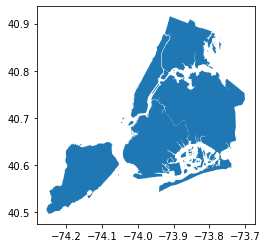

In [86]:
gdf.plot()

Let's put this map into context with a larger map of the area using contextily and following the geopandas docs for adding a basemap.

First we need to import contextily to use it:


In [87]:
import contextily as ctx

The default mapping coordinates for contextily are Web Mercator so we will need to transform our geometric dataset into the Web Mercator projection:

In [88]:
gdf = gdf.to_crs(epsg=3857)

Let's first plot our NYC data on our own axis:

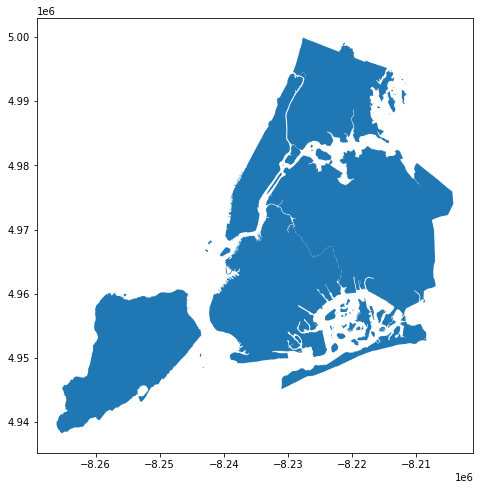

In [89]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax)

plt.show()

So we can see already that the units on the x/y axis are very different! And even the shapes are a little different than the plots we made above. Let's re-call this but add a basemap using contextily:

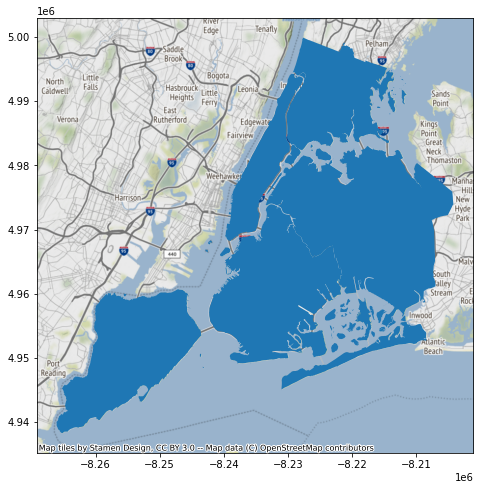

In [90]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax)
ctx.add_basemap(ax=ax)

plt.show()

Hey cool! We can now see our NYC map on top of a larger map of the NYC area. Let's make our plot a little see-through so we can see the basemap underneath:

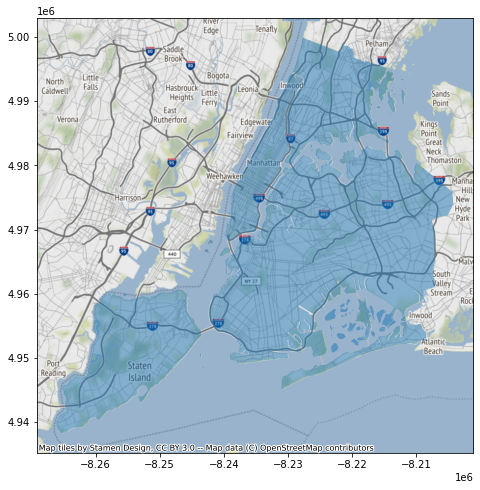

In [91]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)

plt.show()

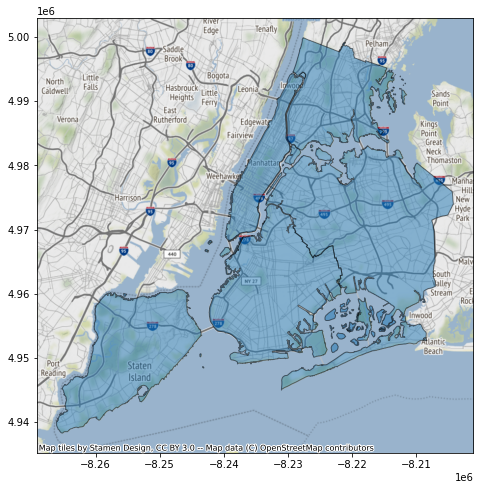

In [92]:
# adding back outline for our borders
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In [93]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
# just in case we over-wrote it or something

In [94]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

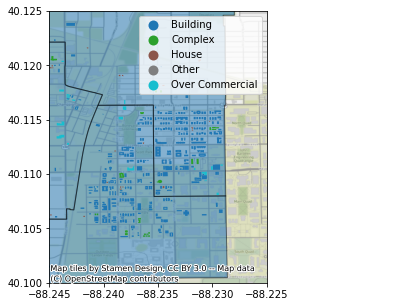

In [103]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha = .5, edgecolor='k')
gdf_apt.plot(column='Building_Type', ax=ax, cmap='tab10', legend=True)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)


plt.show()

## Geopandas + contextily + ipywidgets

In [105]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [108]:
btype = 'Building'

gdf_apt.loc[gdf_apt['Building_Type']==btype]

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry,Bulding_Type
20,21,410 E Green St,462118129026 & 462118129027,64,5,20.0,410 E Green St,,None,Building,...,None,None,None,None,Yes,15958.883057,507.147218,None,"POLYGON ((-88.23259 40.11039, -88.23218 40.110...",NaN
21,22,408 E Green St,462118129017,28,3,21.0,408 E Green St,,AI08-0013,Building,...,,None,None,None,Yes,8914.532959,539.800411,None,"POLYGON ((-88.23259 40.11039, -88.23260 40.110...",NaN
22,23,406 E Green St,462118129017,9,2,22.0,406 E Green St,,AI08-0013,Building,...,,None,None,None,Yes,2434.252197,215.323497,None,"POLYGON ((-88.23284 40.11054, -88.23297 40.110...",NaN
96,97,1114 Broadmoor Dr,452023257004,4,1,112.0,1114 Broadmoor Dr,,AI09-0018,Building,...,,None,None,None,None,2008.372314,187.683177,None,"POLYGON ((-88.26361 40.09367, -88.26373 40.093...",NaN
97,98,1201 Broadmoor Dr,452023256021,2,1,113.0,1201 Broadmoor Dr,Broadmoor Drive Apartments,None,Building,...,None,None,None,None,None,3677.721069,413.708046,None,"POLYGON ((-88.26447 40.09370, -88.26447 40.093...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,3668,213 W Green St,432013208001 thru -003,34,3,NaN,213 W Green St,None,None,Building,...,None,None,None,None,None,9550.097900,564.342790,None,"POLYGON ((-88.24661 40.11001, -88.24661 40.109...",NaN
2306,3669,201 W Green St,"432013208011,-022 thru -023",48,3,NaN,201 W Green St,None,None,Building,...,None,None,None,None,None,11212.774780,619.328109,None,"POLYGON ((-88.24531 40.10988, -88.24531 40.110...",NaN
2307,3670,3102 Palmer Dr,462029427004,30,3,NaN,None,None,None,Building,...,None,None,None,None,None,15342.864868,769.274078,None,"POLYGON ((-88.31770 40.07527, -88.31747 40.075...",NaN
2315,4071,210 S Fourth St,462107377002 thru -004,77,7,NaN,None,None,None,Building,...,None,None,None,None,None,16389.222778,846.476530,None,"POLYGON ((-88.23274 40.11487, -88.23278 40.114...",NaN


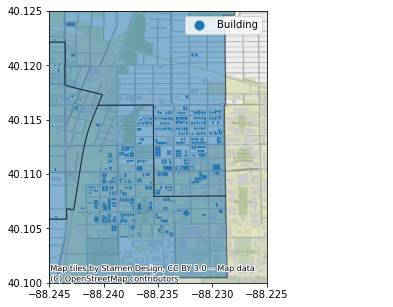

In [113]:
gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=.5, edgecolor='k')
gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='tab10', categorical=True, legend=True)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

In [117]:
def my_geo_plot(btype):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
    plt.show()

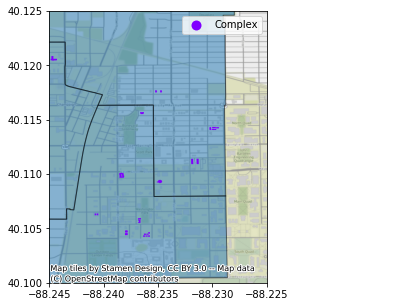

In [118]:
my_geo_plot('Complex')

use ipywidgets.interact 

In [122]:
@ipywidgets.interact(btype=gdf_apt['Building_Type'].unique())
def my_geo_plot(btype):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
    plt.show()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

In [125]:
xrange = ipywidgets.FloatRangeSlider(min = -88*100, mac=-89*100)

In [124]:
xrange

FloatRangeSlider(value=(25.0, 75.0))

In [ ]:
@ipywidgets.interact(btype=gdf_apt['Building_Type'].unique(), xlim=xrange)
def my_geo_plot(btype, xrange):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    # ax.set_xlim(-88.245, -88.225)
    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
    plt.show()

In [127]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is CC6A-F4FC

 Directory of C:\Users\lilpringles\OneDrive - University of Illinois - Urbana\School\Spring_2021\IS_445_Data_Visualization\Week 7

2021-03-08  11:36    <DIR>          .
2021-03-08  11:36    <DIR>          ..
2021-03-08  09:10    <DIR>          .ipynb_checkpoints
2021-03-08  11:36         2,195,377 inClass_week07.ipynb
               1 File(s)      2,195,377 bytes
               3 Dir(s)   3,961,982,976 bytes free
